In [1]:
%load_ext autoreload
%autoreload 2
from davidyu_cfg import *
from finquant.portfolio import build_portfolio
from functions.common.dfcf_fuquan_data import *


2021-02-23 17:15:40,415 - davidyu_cfg.py[line:41] - INFO: load log module
2021-02-23 17:15:40,437 - davidyu_cfg.py[line:43] - INFO: load data_dir module
2021-02-23 17:15:40,440 - davidyu_cfg.py[line:45] - INFO: load make_dir module


In [57]:
from easydl import clear_output

def find_same_date(stock_list):
    k=0
    start_date = '2020-01-01'
    end_date = '2020-12-20'
    for s1 in stock_list:
        if k==0:
            df1 = dfcf_stock_data(s1,start_date,end_date)
            df1 = df1[["dt","close"]].drop_duplicates()
            a = df1["dt"].tolist()
            k+=1
        else:
            df1 = dfcf_stock_data(s1,start_date,end_date)
            df1 = df1[["dt","close"]].drop_duplicates()
            b = df1["dt"].tolist()
            a = list(set(a).intersection(set(b))) 
    return a


def same_date_returns(stock_list,start_date,end_date,same_date):
    start_date = '2020-01-01'
    end_date = '2020-12-20'
    df_return_list = []
    stock_index_list = []
    for s1 in stock_list:
        df1 = dfcf_stock_data(s1,start_date,end_date)
        df1 = df1[["dt","close"]].drop_duplicates()
        df_test = df1["close"]
        dates = df1.dt.values
        df_test.index = dates
        df_test.index.name = 'Date'
        # calculate daily returns
        daily_returns = df_test.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)
        # find returns in the same date
        df_return_update = daily_returns[daily_returns.index.isin(same_date)]
        df_return_list.append(df_return_update.values.tolist())
        stock_index_list.append(s1)
        date_index = df_return_update.index.tolist()
    df_out = pd.DataFrame(df_return_list).T
#     df_out.shape
    df_out.index=date_index
#     print(df_out.head(30))
    df_out.columns = stock_index_list
    return df_out 

def plot_stocks(daily_returns, freq=252):
    import matplotlib.pylab as plt

    """Plots the Expected annual Returns over annual Volatility of
    the stocks of the portfolio.

    :Input:
     :freq: ``int`` (default: ``252``), number of trading days, default
         value corresponds to trading days in a year.
    """
    # annual mean returns of all stocks
    stock_returns = daily_returns.mean()*freq
    stock_volatility = daily_returns.std() * np.sqrt(freq)
    # adding stocks of the portfolio to the plot
    # plot stocks individually:
    plt.scatter(stock_volatility, stock_returns, marker="o", s=100, label="Stocks")
    # adding text to stocks in plot:
    for i, txt in enumerate(stock_returns.index):
        plt.annotate(
            txt,
            (stock_volatility[i], stock_returns[i]),
            xytext=(10, 0),
            textcoords="offset points",
            label=i,
        )
        plt.legend()
# len(a)
#r = list(set(a).intersection(b,c)) 

In [58]:
stock_list = "002803,002810,000157,603697,600761,002595,601100,300371,603856,603416"
#stock_list = "601328"
#stock_list = "002157,002041,600048"
#stock_list = "000403,603605,603345,002311,600276,002410,600066,000651,600176,002475"
# stock_list = stock_list.split(",")
# stock_list = ["002555","300413","600637","002131","002602","300418","603444","002624","002027","300251"]
# stock_list = ["000725","600837","600036","600519","600276","601318","000333","600030","000917","002475"]
stock_list = ["002555","300413","600637","002131","002602","300418","603444","002624","002027","300251"]



same_date = find_same_date(stock_list)
start_date = '2020-01-01'
end_date = '2020-12-20'
df_out = same_date_returns(stock_list,start_date,end_date,same_date)
# df_out.sort_index()
# clear_output()  # 清除输出


,000725,600837,600036,600519,600276,601318,000333,600030,000917,002475
2020-01-03,0.026144,0.005863,0.013800,-0.046218,-0.019761,0.000952,-0.025623,-0.004402,-0.001458,-0.008672
2020-01-06,-0.004246,0.005181,-0.004188,-0.000537,-0.021700,-0.007134,-0.018708,-0.002412,0.005839,0.022393
2020-01-07,-0.006397,-0.003222,-0.002366,0.015590,0.009302,0.006587,0.015288,0.015310,0.062409,0.005133
2020-01-08,0.060086,-0.035553,-0.019499,-0.005930,-0.002269,-0.013682,0.004074,-0.030159,-0.010929,-0.024515
2020-01-09,0.008097,0.015416,0.013169,0.013593,0.026148,0.000483,0.020642,0.020458,0.001381,0.069808
...,...,...,...,...,...,...,...,...,...,...
2020-12-14,0.021654,-0.002387,0.039597,0.004945,0.006816,0.018467,0.005238,0.003130,-0.001923,-0.017167
2020-12-15,0.015414,-0.002392,-0.000451,-0.007102,0.076684,-0.015851,0.015277,-0.001040,0.013487,0.010640
2020-12-16,-0.018975,-0.001599,-0.006539,0.013210,-0.000103,0.006257,0.027645,-0.006942,-0.022814,0.039531
2020-12-17,0.015474,0.020817,-0.000227,0.013864,0.084218,0.024643,0.017821,0.021321,0.005837,0.001147


In [64]:
freq = 252
risk_free_rate=0.005
# daily_returns = df_p.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)
df_returns = df_out

comp_mean_returns = df_returns.mean()*freq
comp_stock_volatility = df_returns.std() * np.sqrt(freq)
comp_cov = df_returns.cov()


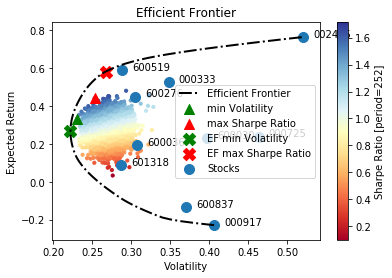

In [67]:
from finquant.monte_carlo import MonteCarloOpt
from finquant.efficient_frontier import  EfficientFrontier

# portfolio["Allocation"] / self.totalinvestment



mc = MonteCarloOpt(df_returns,num_trials=5000,risk_free_rate=0.005,
        freq=252,
        initial_weights=None)
opt_w, opt_res = mc.optimisation()


ef = EfficientFrontier(
        df_returns.mean()*1,
        df_returns.cov(),
        risk_free_rate=0.005,
        freq=252,
    )




mc.plot_results()
ef.plot_efrontier()
ef.plot_optimal_portfolios()

# plotting individual stocks
plot_stocks(df_returns)

In [71]:
opt_w

,000725,600837,600036,600519,600276,601318,000333,600030,000917,002475
Min Volatility,0.065115,0.033587,0.186663,0.225631,0.245714,0.085032,0.074414,0.024025,0.056802,0.003017
Max Sharpe Ratio,0.035447,0.011130,0.164412,0.181208,0.139039,0.088914,0.200231,0.017407,0.009464,0.152747


In [ ]:
totalinvestment=1

self.portfolio.append(stock.investmentinfo, ignore_index=True)

In [70]:
comp_mean_returns

000725    0.237711
600837   -0.134844
600036    0.191986
600519    0.588891
600276    0.448251
601318    0.088395
000333    0.524689
600030    0.231903
000917   -0.228989
002475    0.762197
dtype: float64

In [68]:
def port_val(pf):
    return_data = {'expected_return':pf.expected_return,
                   'volatility':pf.volatility,
                   'sharpe':pf.sharpe,
                   'skew':pf.skew,
                   'kurtosis':pf.kurtosis}
    return return_data
port_val(pf)
pd.DataFrame(port_val(pf))

NameError: name 'pf' is not defined

In [30]:
daily_return = df_p.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)
daily_return.mean()

601328   -0.0007
dtype: float64

In [26]:
df_log_return = pf.comp_daily_log_returns()
# df_log_return.std()

daily_return = df_p.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)

freq = 252
daily_return.mean() * freq

601328   -0.176298
dtype: float64

In [84]:
pf.freq


252

/home/davidyu/software/Anaconda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


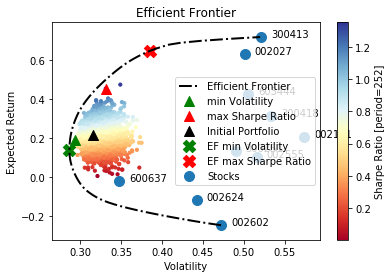

In [15]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()

In [16]:
opt_w

,601328,601288,601006,601939
Min Volatility,0.247981,0.516323,0.235034,0.000662
Max Sharpe Ratio,0.062561,0.062277,0.030513,0.844650


In [14]:
total = 1274000+3170000+922500+908000
1274000/total


0.2030440672563551